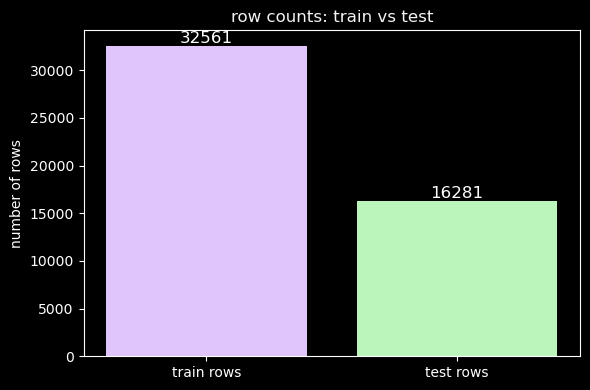

train data shape: (32561, 15)
test data shape: (16281, 15)

train data sample:
   0                 1       2          3   4                   5   \
0  39         State-gov   77516  Bachelors  13       Never-married   
1  50  Self-emp-not-inc   83311  Bachelors  13  Married-civ-spouse   
2  38           Private  215646    HS-grad   9            Divorced   
3  53           Private  234721       11th   7  Married-civ-spouse   
4  28           Private  338409  Bachelors  13  Married-civ-spouse   

                  6              7      8       9     10  11  12  \
0       Adm-clerical  Not-in-family  White    Male  2174   0  40   
1    Exec-managerial        Husband  White    Male     0   0  13   
2  Handlers-cleaners  Not-in-family  White    Male     0   0  40   
3  Handlers-cleaners        Husband  Black    Male     0   0  40   
4     Prof-specialty           Wife  Black  Female     0   0  40   

              13     14  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-Sta

In [ ]:
# dataset testing for simple visualization

import matplotlib.pyplot as plt
plt.style.use('dark_background')

counts = [df_train.shape[0], df_test.shape[0]]
labels = ['train rows', 'test rows']

plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=['#dfc5fb', '#bcf5bc'])
plt.title('row counts: train vs test', color='#f4f4f4')
plt.ylabel('number of rows')
for i, val in enumerate(counts):
    plt.text(i, val+350, str(val), color='white', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

## Step 1, import libraries and load datasets

import pandas as pd 

#  load the training datasets from the tabulardata folder
df_train = pd.read_csv('adult.data', header=None, skipinitialspace=True)

# load the test datasets from the file 'adult.test'
# the first line of 'adult.test' is not data, so we skip it!
df_test = pd.read_csv('adult.test', header=None, skiprows=1, skipinitialspace=True)

# quick check to make sure both loaded properly
print("train data shape:", df_train.shape)
print("test data shape:", df_test.shape)

# preview first few rows of each
print("\ntrain data sample:")
print(df_train.head())

print("\ntest data sample:")
print(df_test.head())



In [76]:
## Step 2, data overview.
# here we check the shape, column names, types and any missing values in the dataset.
# data visualization is not needed here, as we are printing missing values in the dataset.

print("number of rows and columns:", df_train.shape)

print("\ncolumn names & datatypes:")
print(df_train.dtypes)

print("\ninfo about non-null counts for each column:")
df_train.info()

print("\nmissing values in each column:")
print(df_train.isnull().sum())

print("\nsimple summary stats for numerical columns (mean, std, min, max):")
print(df_train.describe())

# this works by showing the structure, and details of the dataset


number of rows and columns: (32561, 15)

column names & datatypes:
0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
13    int64
14    int64
dtype: object

info about non-null counts for each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       32561 non-null  int64
 1   1       32561 non-null  int64
 2   2       32561 non-null  int64
 3   3       32561 non-null  int64
 4   4       32561 non-null  int64
 5   5       32561 non-null  int64
 6   6       32561 non-null  int64
 7   7       32561 non-null  int64
 8   8       32561 non-null  int64
 9   9       32561 non-null  int64
 10  10      32561 non-null  int64
 11  11      32561 non-null  int64
 12  12      32561 non-null  int64
 13  13      32561 non-null  int64
 14  14      32561 non-nu

In [ ]:
## step 3, data cleaning and preprocessing.
# here we handle the missing values, encode variables, and prepare the data for modeling

# (test) fill missing values (if any) with the mode for categorical, mean for numerical
for col in df_train.columns:
    if df_train[col].isnull().sum() > 0:
        if df_train[col].dtype == 'object':
            df_train[col].fillna(df_train[col].mode()[0], inplace=True)
        else:
            df_train[col].fillna(df_train[col].mean(), inplace=True)

# convert categorical columns to numeric using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df_train.columns:
    if df_train[col].dtype == 'object':
        df_train[col] = le.fit_transform(df_train[col])

# check if there are still missing values
print("missing values after cleaning:")
print(df_train.isnull().sum())


missing values after cleaning:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64


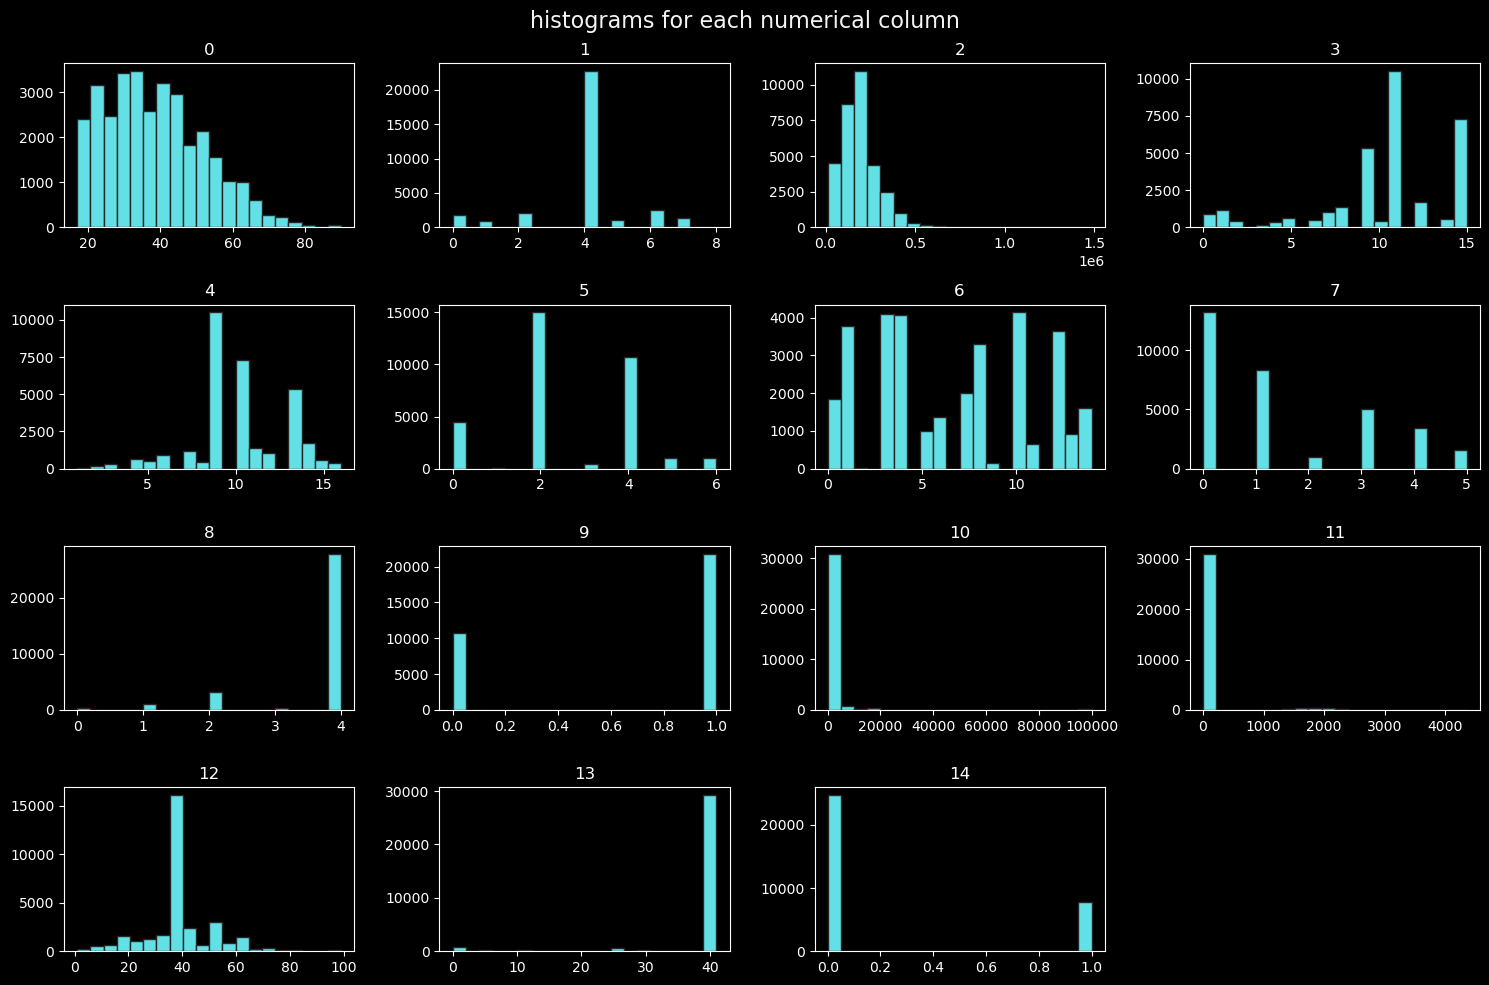

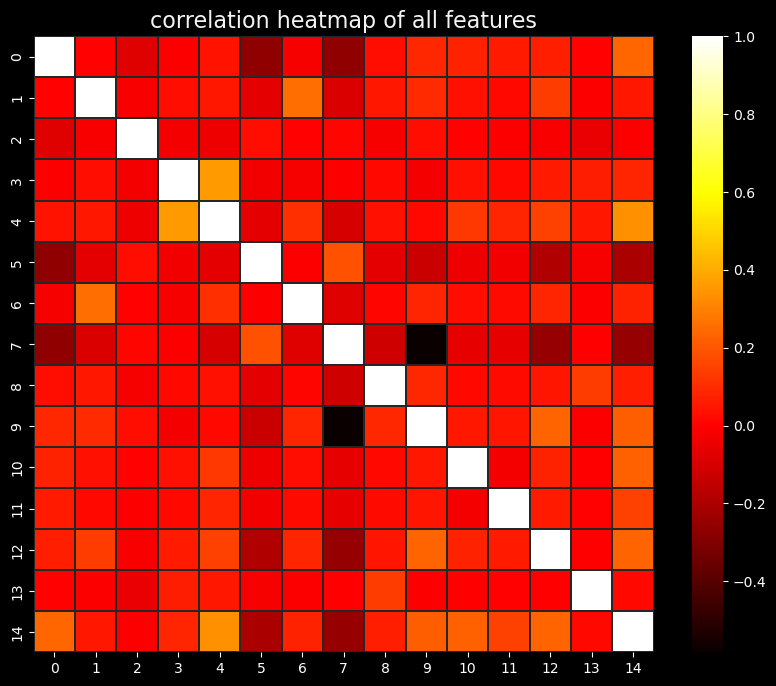

In [80]:
## step 4, data exploration and visualization, dark themed.
# here we visualize and plot the data distributions, relationships, and potential issues through a histogram and heatmap.

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
sns.set_palette('deep')  # clear, visually distinct colors

# histograms for each numerical column
df_train.hist(
    bins=20,
    figsize=(15, 10),
    color='#62e0e5',        # soft cyan for bars
    edgecolor='#262626',    # dark grey edges
    grid=False
)
plt.suptitle("histograms for each numerical column", color='#f4f4f4', fontsize=16)
plt.tight_layout()
plt.show()

# visualize correlations between numerical features with cmap
plt.figure(figsize=(10,8))
sns.heatmap(
    df_train.corr(),
    annot=False,
    cmap='hot',            # colormap, to visualize the correlation heatmap
    cbar=True,
    linewidths=0.3,
    linecolor='#262626'
)
plt.title("correlation heatmap of all features", color='#f4f4f4', fontsize=16)
plt.show()


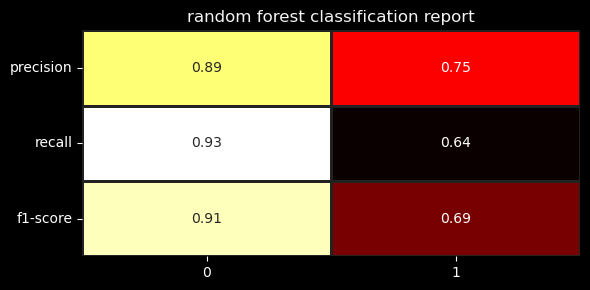

logistic regression accuracy: 0.8085367726086289

classification report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      4942
           1       0.69      0.38      0.49      1571

    accuracy                           0.81      6513
   macro avg       0.76      0.66      0.69      6513
weighted avg       0.79      0.81      0.79      6513


confusion matrix:
 [[4671  271]
 [ 976  595]]
random forest accuracy: 0.8616612927990174

classification report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.75      0.64      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513


confusion matrix:
 [[4601  341]
 [ 560 1011]]


In [82]:
## step 5, here we configure the datasets using classical machine learning models.
# here we train and evaluate some standard classifiers on the cleaned dataset

# visualizing the outputs so we can make sense of this information

from sklearn.metrics import classification_report
import pandas as pd

# get the classification report as a dict
report = classification_report(y_val, y_pred_rf, output_dict=True)
report_df = pd.DataFrame(report).transpose().iloc[:2]  # only classes 0 and 1

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
plt.figure(figsize=(6,3))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']].T, annot=True, cmap='hot', fmt='.2f',
            cbar=False, linewidths=1, linecolor='#222')
plt.title('random forest classification report', color='#f4f4f4')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# we can suppress the conversions from sklearn by importing warnings

import warnings

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# split data into features and label (target is column 14)
X = df_train.drop(14, axis=1)
y = df_train[14]

# split X and y into train/test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# logistic regression
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)
print("logistic regression accuracy:", accuracy_score(y_val, y_pred_logreg))
print("\nclassification report:\n", classification_report(y_val, y_pred_logreg))
print("\nconfusion matrix:\n", confusion_matrix(y_val, y_pred_logreg))

# random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
print("random forest accuracy:", accuracy_score(y_val, y_pred_rf))
print("\nclassification report:\n", classification_report(y_val, y_pred_rf))
print("\nconfusion matrix:\n", confusion_matrix(y_val, y_pred_rf))



